# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder
### Student: Luna McBride

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luna McBride"
COLLABORATORS = ""

---

In [2]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Understanding generalization error
## (100 points total)

## Question 1: (20 pts) Ground truth classification function

Your task is to implement a function named `f` that classifies data points based on a combined sine and cosine boundary in a 2D space. Here's the detailed specification:

- The function should accept a single pair of numbers or a 2D numpy array of shape `(n_samples, 2)` where each row represents a data point in the form `[x1, x2]`.
- The classification is determined by the function:
$$ f(x_1, x_2) = 
\begin{cases} 
1 & \sin(5 \pi x_1 x_2) + \cos(10\pi x_2 + 5x_1) > 0 \\
0 & \text{otherwise}
\end{cases}
$$ 
- The function should return an array of labels (either 0 or 1) corresponding to the input data points.
- The function is only defined between 0 and 1 for $x_1$ and $x_2$ (both continuous). If the user enters an input outside the range, throw an exception `Exception("Input from 0 to 1 only")`.

## Hints:
- Use numpy for the majority of the solution. Use the constant `np.pi` for maximum accuracy.

In [3]:
def f(x):
    """
    True function for classification
    x: a single pair of numbers or a 2D numpy array of shape (n_samples, 2)
    Returns an array of labels (0 or 1).
    """
    # YOUR CODE HERE
    #If the x is a list of lists, handle the lists separately
    if type(x[0]) == list:
        labels = [] #Create a list of labels
        
        #For each pair of x in the list of lists of x
        for xPair in x:
            #If the x's are not in the range 0 to 1, raise an exception
            if not 0<=xPair[0]<=1 or not 0<=xPair[1]<=1:
                raise Exception("Input from 0 to 1 only") #Raise the 0 to 1 only exception
            
            #Calculate the sin cos equation given above
            sinCos = np.sin(5*np.pi*xPair[0]*xPair[1]) + np.cos((10*np.pi*xPair[1]) + 5*xPair[0])
            
            #If the sinCos is greater than 0, the label is 1
            if sinCos > 0:
                labels.append(1) #Append the 1 label to the list
            
            #If the sinCos is not greater than 0, the label is 0
            else:
                labels.append(0) #Append the 0 label to the list
    
    #If the x is a single list
    else:
        #If the x's are not in the range 0 to 1, raise an exception
        if not 0<=x[0]<=1 or not 0<=x[1]<=1:
                raise Exception("Input from 0 to 1 only") #Raise the 0 to 1 only exception
                
        labels = 0 #Set the label to a default label of 0
        
        #Calculate the sin cos equation given above
        sinCos = np.sin(5*np.pi*x[0]*x[1]) + np.cos((10*np.pi*x[1]) + 5*x[0])
        
        #If the sinCos equation is greater than 0, update the labels variable to 1
        if sinCos > 0:
            labels = 1 #Update the labels variable to 1
    
    return labels #Return the labels

In [4]:
# test your function here
f([0,0])

1

In [5]:
""" (20 points) Check whether the function handles single vs. multiple points"""
assert f([0.2, 0.5]) == 1 # can work with one point
assert np.array_equal(f([[0.2, 0.5], [0.5, 0.7], [0.8, 0.9]]), np.array([1, 1, 0])) # can work with an array

# should produce an exception
try:
    f([1.1, 0.5])  # An input with a value outside the range
    assert False, "The function did not raise an exception for values outside [0, 1]"
except Exception as e:
    assert str(e) == "Input from 0 to 1 only", f"Unexpected exception message: {e}"

## Question 2: (10 points) Plotting Decision Boundaries

In many machine learning applications, especially classification tasks, it's crucial to visualize how the classifier divides the input space. Such visualizations help in understanding the nature of the classifier, its complexity, and potential areas of misclassification.

Your task is to implement the function `plot_boundary` that visualizes the decision boundary of a given classifier function in the 2D space.

**Function Specification:**

- The function `plot_boundary` receives a single argument `func`, which is the classifier function.
- The classifier function `func` takes as input a single point or an array of points in the form `[x1, x2]` and returns a label (0 or 1).
- The `plot_boundary` function should plot the decision boundary created by the classifier function over the domain $[0,1] \times [0,1]$.
- Your visualization should clearly show regions classified as `0` or `1` using different colors. Including a color bar can provide additional clarity.
- Ensure that the axes are appropriately labeled as 'x1' and 'x2'.

**Hints:**
1. Use `numpy` to generate a grid of points in the 2D space.
2. For each point in the grid, determine its label using the given classifier function.
3. Use `matplotlib` to visualize the decision boundary. The `contourf` function can be particularly useful.

**Examples:**

Given a simple classifier function that classifies points based on whether \(x1 > 0.5\), your `plot_boundary` function should visualize a vertical decision boundary at \(x1 = 0.5\).

```python
plot_boundary(lambda x: x[:, 0] > 0.5)
plt.title('x1 divider');
```

![](./fig1.png)

```python
plot_boundary(lambda x: np.sin(x[:, 0]*x[:, 1]*20) > 0)
plt.title('weird function');
```

![](./fig2.png)

Source Used: https://psrivasin.medium.com/plotting-decision-boundaries-using-numpy-and-matplotlib-f5613d8acd19

In [44]:
def plot_boundary(func):
    """
    Plots the decision boundary created by the function.
    
    func: The function that determines the label based on the input coordinates.
    """
    # YOUR CODE HERE
    x = [] #Create a list to hold the grid
    
    #Create two linspaces, one to represent the x direction and the other the y
    x1 = np.linspace(0,1, 100) 
    x2 = np.linspace(0,1, 100) #I named this x2 instead of y as it represents the grid, which is the x in this code
    xgrid, ygrid = np.meshgrid(x1, x2) #Create a proper grid by combining the linspaces
    
    #See https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    x = np.c_[xgrid.ravel(), ygrid.ravel()] #Connect the grid together by raveling and using c_, which combines them into a 2d array
    y = func(x) #Pass the x into the given function to get our y
    plt.contourf(xgrid,ygrid, y.reshape(xgrid.shape)) #Plot the grid with the correct function values
    plt.grid(True) #Plot the grid

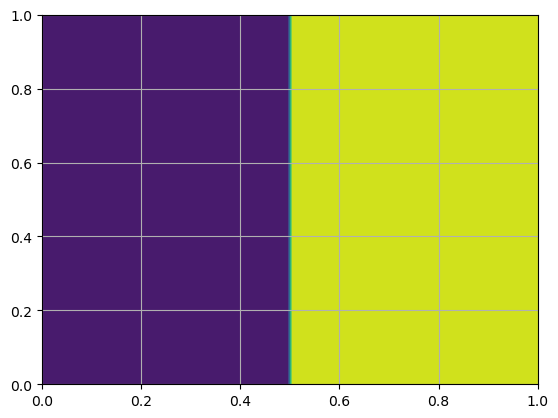

In [45]:
# YOUR CODE HERE
plot_boundary(lambda x: x[:, 0] > 0.5)
#raise NotImplementedError()

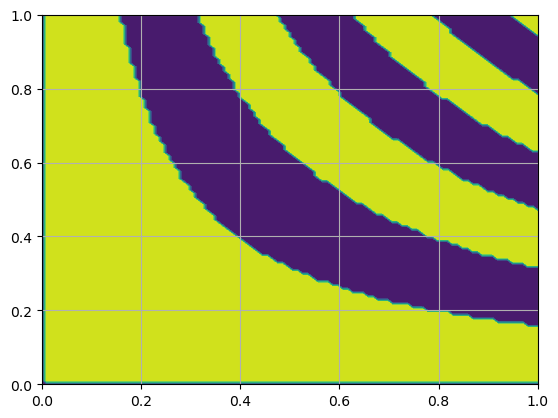

In [8]:
plot_boundary(lambda x: np.sin(x[:, 0]*x[:, 1]*20) > 0)

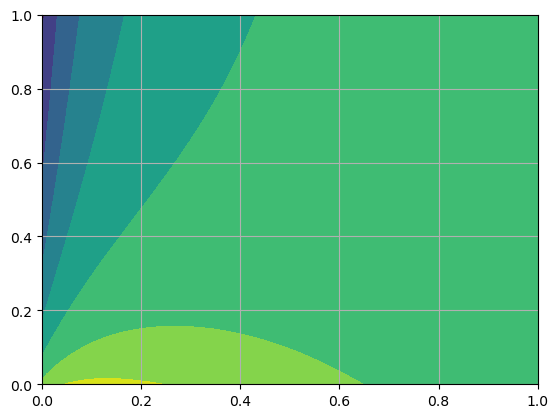

In [9]:
# plot your function here
plot_boundary(lambda x: np.log((x[:, 0]+0.1)**2) * np.log((x[:,1]+0.1)) - 1/(x[:, 0]+0.1))

## Question 3: (30 points) Majority Vote Classifier

In many machine learning tasks, especially when data is scarce or noisy, it's helpful to rely on simple, interpretable models. One such approach is the majority vote classifier that partitions the input space into small regions and assigns a label based on the majority vote of training examples in that region.

Your task is to implement the `majority_vote_classifier` function that creates such a classifier.

**Function Specification:**

- The function `majority_vote_classifier` takes in two arguments:
  - `x`: The training data, a 2D numpy array of shape `(n_samples, 2)`. Each row represents a data point in the form `[x1, x2]`.
  - `y`: The labels for the training data, a 1D numpy array of shape `(n_samples,)`. Each label is either `0` or `1`.

- The input space is divided into a grid of squares, each of size $0.1 \times 0.1$, ranging from 0 to 1 for both $x_1$ and $x_2$.

- For each square in the grid, determine the label (0 or 1) that appears most frequently in the training data for points that fall into that square. In case of a tie or no data, the square should default to a label of `1`.

- The function should return a new function (a classifier) that, given a new data point or an array of data points, returns the predicted label(s) based on the majority vote in the corresponding grid square(s).

**Hints:**

1. Start by initializing a grid to store the majority vote for each square. You can use a numpy array of shape `(10, 10)` for this purpose.
2. For each square in the grid, determine its boundaries, and identify the training points that fall within these boundaries.
3. Compute the majority label for the points within each square and store it in the grid.
4. The returned classifier function should be able to handle both single data points and arrays of data points.

**Examples:**

1. Suppose the training data consists of three points: `[[0.05, 0.05], [0.15, 0.15], [0.85, 0.85]]` with labels `[0, 1, 0]`. If a new data point `[0.12, 0.14]` is passed to the classifier, it should return the label `1` based on the majority vote of the training data in the corresponding grid square.

In [10]:
def getIndex(typeGrid, x):
    """
    Gets the index of a specific x or y value depending on where it would fit in the voting grid indecies
    
    typeGrid: Which axis is being represented ("x" for x, "y" for y)
    x: The value within normal graphing space (a single float)
    
    Returns the specified index to go into the voting grid
    """
    grid   = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #Define the steps of the grid, as each square is 0.1x0.1
    
    #If we are looking for the x representation
    if typeGrid == "x":
        indexX = [0,1,2,3,4,5,6,7,8,9] #Set the x indecies from left to right
        gridXdir = list(zip(grid, indexX)) #Zip the x with the actual grid representation
        
        #For each area of the grid, find which square the value should be placed into
        for grid, index in gridXdir:
            #If the x is within the square being represented
            if grid <= x  and x <= (grid + 0.1):
                return index #Return the proper index
            
    #If we are looking for the y representation
    else:
        indexY = [9,8,7,6,5,4,3,2,1,0] #Set the y indecies from bottom to top
        gridYdir = list(zip(grid, indexY)) #Zip the indecies with their actual grid counterpart
        for grid, index in gridYdir:
            #If the y is within the square being represented
            if grid <= x and x <= (grid + 0.1):
                return index #Return the proper index
    
    raise Exception("Not in proper bounds") #Raise an exception if something above 1 or below 0 are passed in
    
def getCoords(x):
    """
    Function to get the coordinates of the point in the grid
    As (0,0) is at square [0,9], the y and x axes need to be handled differently 
    
    x: The regular x,y coordinates of the point (list of shape (1, 2))
    
    Returns the coordinates that fit within the voting grid
    """
    x1 = x[0] #Get the x value
    x2 = x[1] #Get the y value (denotated as x2 to not confuse it with the y we are solving for)
    x1Index = getIndex("x", x1) #Get the x index in the grid
    x2Index = getIndex("y", x2) #Get the y index in the grid
    
    return x1Index, x2Index #Return the indecies of the point in the voting grid

def majority_vote_classifier(x, y):
    """
    Generator function that creates a majority-vote classifier.
    
    x: Training data (2D numpy array of shape (n_samples, 2))
    y: Labels (1D numpy array of shape (n_samples,))
    
    Returns a function that classifies new data points based on the majority vote.
    """
    
    # Create an empty matrix to store majority votes
    majority_grid = np.ones((10, 10), dtype=int)  # Default to 1 (break ties with 1)
    
    
    #If the x is a list of lists, handle the lists separately
    if type(y) != int:
        lengthY = len(y) #Get the length of y so the for loop is not calculating that constantly
        yIndex = [] #Create an index list for the indecies normally passed into the grid to check for ties
        yUnique = [] #Create an index list for unique coordinates
        
        #For each point, get the coordinates and update the grid
        for i in range(0, lengthY):
            x1Index, x2Index = getCoords(x[i]) #Call the function to get the coordinates
            yIndex.append([x1Index, x2Index]) #Put the indecies into the index list
            
        #For each index set, check for uniqueness. If not unique, flip the final class to 1 to represent a tie
        for j in range(0, lengthY):
            x1 = yIndex[j][0] #Pull out the x1 from yIndex
            x2 = yIndex[j][1] #Pull out the x2 from yIndex
            
            #If the index is not already in the unique list, add it, and update the grid
            if yIndex[j] not in yUnique:
                yUnique.append(yIndex[j]) #Add the unique index set to the unique list
                majority_grid[x1][x2] = y[j] #Update the grid
            
            #If the index set is not unique, change y to 1 to represent a tie
            else:
                majority_grid[x1][x2] = 1 #Update the grid to add the tie in, as the last y in that square is the one that keeps
    
    #If there is only one value
    else:
        #Just check for updating to 0; there are not other lists to conflict with
        if y==0:
            x1Index, x2Index = getCoords(x) #Get the coordinates
            majority_grid[x1Index][x2Index] = 0 #Set the new item to 0
        
    # YOUR CODE HERE
    def classifier(x):
        """
        The classifier created by the generator function
    
        x: Testing data (2D numpy array of shape (n_samples, 2))
    
        Returns either a single integer label or an array of predicted labels
        """
        grid = majority_grid #Pull the grid from the original function, source https://stackoverflow.com/questions/6910071/python-store-variable-in-function-and-use-it-later
        
        #If the first value is a list or array, implying multiple lists/arrays (updated to add arrays for the plotter)
        if type(x[0]) == list or type(x[0]) == np.ndarray:
            labels = [] #Initiate a labels variable
            
            #For each individual list or array, get its coordinates and a label
            for arr in x:
                x1Index, x2Index = getCoords(arr) #Get the coordinates in the grid
                labels.append(grid[x1Index][x2Index]) #Add the label to the list of labels
            return np.array(labels) #Return the labels as an array, to not get the plotter mad
        
        #If there is only a single list given, implying one point
        else:
            x1Index, x2Index = getCoords(x) #Get the coordinates
            return grid[x1Index][x2Index] #Return the label
        
    return classifier #Return the classifier function for later use

In [11]:
h = majority_vote_classifier(np.array([[0.05, 0.05], [0.15, 0.15], [0.85, 0.85]]), 
                             np.array([0, 1, 0])
)
h([0.05, 0.05])

0

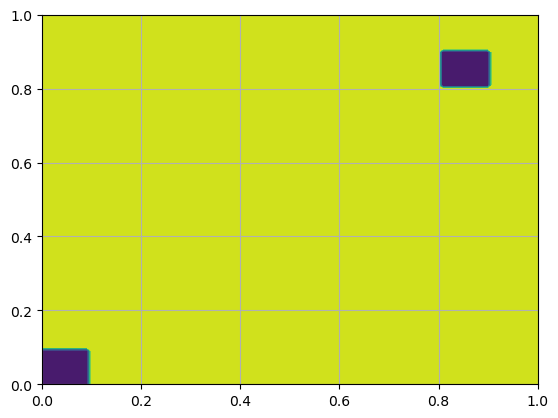

In [12]:
# should be able to use the plot_boundary function
plot_boundary(h)

In [13]:
#Copy the original grading test, flipping the 0.88,0.88 to show the tie bound in effect
def test_majority_vote_classifier2():
    # Sample training data
    x_train = np.array([[0.05, 0.05], [0.15, 0.15], [0.85, 0.85], [0.12, 0.14], [0.88, 0.88]])
    y_train = np.array([0, 1, 0, 1, 0])

    # Generate the classifier function
    classifier_fn = majority_vote_classifier(x_train, y_train)

    # Check that the function returns a callable object
    assert callable(classifier_fn), "The returned object is not callable."

    # Check the output of the generated classifier for specific inputs
    assert classifier_fn([0.12, 0.14]) == 1, "Unexpected classification for the point [0.12, 0.14]."
    assert classifier_fn([0.88, 0.88]) == 1, "Unexpected classification for the point [0.88, 0.88]."
    assert classifier_fn([0.05, 0.05]) == 0, "Unexpected classification for the point [0.05, 0.05]."

    # Check for an array of inputs
    input_array = [[0.05, 0.05], [0.88, 0.88], [0.12, 0.14]]
    expected_labels = [0, 1, 1]
    assert np.array_equal(classifier_fn(input_array), expected_labels), \
        "Unexpected classifications for the input array."

test_majority_vote_classifier2()

In [14]:
"""(30 points) Test to check if your classifier is learning from data"""
def test_majority_vote_classifier():
    # Sample training data
    x_train = np.array([[0.05, 0.05], [0.15, 0.15], [0.85, 0.85], [0.12, 0.14], [0.88, 0.88]])
    y_train = np.array([0, 1, 0, 1, 1])

    # Generate the classifier function
    classifier_fn = majority_vote_classifier(x_train, y_train)

    # Check that the function returns a callable object
    assert callable(classifier_fn), "The returned object is not callable."

    # Check the output of the generated classifier for specific inputs
    assert classifier_fn([0.12, 0.14]) == 1, "Unexpected classification for the point [0.12, 0.14]."
    assert classifier_fn([0.88, 0.88]) == 1, "Unexpected classification for the point [0.88, 0.88]."
    assert classifier_fn([0.05, 0.05]) == 0, "Unexpected classification for the point [0.05, 0.05]."

    # Check for an array of inputs
    input_array = [[0.05, 0.05], [0.88, 0.88], [0.12, 0.14]]
    expected_labels = [0, 1, 1]
    assert np.array_equal(classifier_fn(input_array), expected_labels), \
        "Unexpected classifications for the input array."

def test_another_majority_vote_classifier():
    # New sample training data
    x_train_new = np.array([[0.2, 0.2], [0.2, 0.8], [0.8, 0.2], [0.8, 0.8], [0.5, 0.5]])
    y_train_new = np.array([0, 1, 1, 0, 1])

    # Generate the classifier function
    classifier_fn_new = majority_vote_classifier(x_train_new, y_train_new)

    # Check that the function returns a callable object
    assert callable(classifier_fn_new), "The returned object is not callable."

    # Check the output of the generated classifier for specific inputs
    assert classifier_fn_new([0.2, 0.2]) == 0, "Unexpected classification for the point [0.2, 0.2]."
    assert classifier_fn_new([0.2, 0.8]) == 1, "Unexpected classification for the point [0.2, 0.8]."
    assert classifier_fn_new([0.8, 0.8]) == 0, "Unexpected classification for the point [0.8, 0.8]."

    # Check for an array of inputs
    input_array_new = [[0.2, 0.2], [0.8, 0.8], [0.5, 0.5]]
    expected_labels_new = [0, 0, 1]
    assert np.array_equal(classifier_fn_new(input_array_new), expected_labels_new), \
        "Unexpected classifications for the new input array."

test_majority_vote_classifier()
test_another_majority_vote_classifier()

## Question 4 (20 points): Computing the risk of your classifier

In the realm of machine learning and statistics, the "risk" of a decision function is a crucial concept. It represents the expected loss or error of that decision function. In the context of classification, it can be thought of as the probability that the classifier will misclassify a randomly chosen point.

Given a true function `f` and a hypothesis function `h`, both of which map from an input space to $\{0, 1\}$, the risk $L_{(D,f)}(h)$ is defined as:

$$
L_{(D,f)}(h) = P(h(X) \neq f(X))
$$

Where $X$ is a random variable representing a data point drawn from the input space.

For this assignment, assume that data distribution $D$  is distributed uniformly in the square $[0,1]^2$, essentially rendering $P(X)=1$

**Your Task:**

Implement a function `compute_risk` that computes the risk of a hypothesis function `h` given the true function `f` for the uniform data distribution describe above.

**Function Specification:**

- The function `compute_risk` should accept two arguments, `f` and `h`, which are both classification functions.
- Both `f` and `h` accept input in the form of a single point or a numpy array of points, and return the corresponding labels (0 or 1).
- The function should return a float value representing the risk of `h`.

**Hints:**

1. Consider using numerical integration or sampling methods to approximate the risk, given the uniform distribution in the square \([0,1]^2\).
2. The risk is essentially the area over which `f` and `h` disagree.

In [15]:
# optional if using
from scipy.integrate import nquad

def compute_risk(f, h):
    """
    Computes the risk of the hypothesis function h given the true function f.
    Approach: sampling
    """
    # YOUR CODE HERE
    data = [] #Initiate a list to hold the data values
    n = 200 #n for an n by n uniform matrix. 200 is just a fast one that worked
    risk = 0 #Set a starting value to the risk
    
    #For each ij coordinate, create the point and append it to the data list
    for i in range(0,n):
        for j in range(0,n):
            scale = 1/n #Scale the values between 0 and 1
            data.append([scale*i, scale*j]) #Add the values to the data list
            
    #For each point, add 1 for each mistake made
    for point in data:
        risk += int(h(point) != f(point)) #Add 1 based off the truth value of the label inequality
        
    #return frisk
    return risk/(n**2) #Return the risk divided by the number of values

In [16]:
# test on your own function
h = majority_vote_classifier(np.array([[0.05, 0.05], [0.15, 0.15], [0.85, 0.85]]), 
                             np.array([0, 1, 0])
)
compute_risk(f, h)

0.40415

In [17]:
# Risk of itself should be 0
compute_risk(f, f)

0.0

In [18]:
f_test = lambda x: [1] if x[0] > 0.5 else [0]
h_test = lambda x: [1] if x[1] > 0.5 else [0]
print(abs(compute_risk(f_test, h_test) - 0.5))

4.999999999999449e-05


In [19]:
"""(20 points) Test compute risk"""
def compute_risk_tests():
    # Tests
    f_test = lambda x: [1] if x[0] > 0.5 else [0]
    h_test = lambda x: [1] if x[1] > 0.5 else [0]
    
    # The true risk is 0.5 since half of the space [0,1]^2 will have disagreement between f_test and h_test
    assert abs(compute_risk(f_test, h_test) - 0.5) < 1e-4, "Test failed for sample functions"
    np.testing.assert_almost_equal(compute_risk(f, f), 0, err_msg="Risk of function should be 0")

compute_risk_tests()

## Question 5: (10 points) Risk Analysis with Majority Vote Classifier

In this question, you will explore the concept of risk through simulation. Specifically, you will examine how the risk of a classifier evolves as the size of the training dataset changes. 

**Your Task:**

1. Implement a simulation in which you perform the following steps multiple times for different sizes of training datasets:
    - Randomly sample a dataset of size `m` from the square $[0,1]^2$. Assume a uniform distribution for $x1$ and $x2$.
    - Using the sampled dataset, learn a classification function `h` based on the majority vote classifier.
    - Compute the risk of the function `h` using the true function `f`.

2. Vary `m` from 0 to 5,000 in steps of 500 and plot the risk of `h` against `m`.

**Hints:**

- Remember, the risk is essentially the probability that `h` will misclassify a randomly chosen point from the input space.
- You can use the `majority_vote_classifier` and `compute_risk` functions from the previous question.
- Think about the nature of the majority vote classifier and how it operates. Does it have the capacity to fit the data?

In [20]:
# YOUR CODE HERE

square = [] #The nxn square we will be building
n = 100 #The n dimension for the square
rangeN = range(0,n) #The range from 0 to n to get to a specific point

#For each ij coordinate, create the point and append it to the square
for i in range(0,n):
    for j in range(0,n):
        scale = 1/n #Scale the values between 0 and 1
        square.append([scale*i, scale*j]) #Add the values to the square
            
#For each m range 0 to 5000 with steps of 500, randomly choose points from the square and fit the previous classifier
for m in range(0, 5000, 500):
    #Randomly choose m points. Since the square is not actually a square, this is emulated by i*10 + j
    x = [square[np.random.choice(rangeN)*10 + np.random.choice(rangeN)] for i in range(0,m)] #See https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
    y = [np.random.choice(2) for j in range(0,m)] #Randomly choose between 0 or 1 for the y label m times
    h = majority_vote_classifier(np.array(x), np.array(y)) #Train the classifier on this random data
    print(f"Risk for m = {m}: {compute_risk(h,f)}") #Print the risk at each m

Risk for m = 0: 0.4082
Risk for m = 500: 0.4082
Risk for m = 1000: 0.4082
Risk for m = 1500: 0.4082
Risk for m = 2000: 0.4082
Risk for m = 2500: 0.4082
Risk for m = 3000: 0.4082
Risk for m = 3500: 0.4082
Risk for m = 4000: 0.4082
Risk for m = 4500: 0.4082


**Question 5.1 (10 pts): Comment on the results. In particular, answer the following question:**

- Why doesn't the majority vote classifier seem to overfit, even with larger training datasets?

As there are more points to compare, there are more conflicts that can just get ignored by the classifier, since the fights make them automatically become 1 in the grid. The loss we are seeing is likely the proper function's values mismatching where the h model throws its hands up at multiple players in the same grid space. There are only so many grid spaces to fit into before this starts to happen even in a perfect world with one point going into each grid space. There is no overfitting because of that. Heck, there is probably no fitting at all as m approaches infinity. It would probably be more interesting without that clause, as values would be flickering back and forth as more and more cases are pushed into those few squares.